In [2]:
print('hello world')

hello world


In [1]:
import os
import sklearn
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import pandas as pd
import openpyxl
import xlrd
import xlsxwriter
import glob
import re
from pathlib import Path
import seaborn as sns

In [2]:
def check_valide_data_dim(df):
    df_unique=df[-df.target.isna()]
    print("number of data points:", df_unique.shape[0])
    print("number of features:", df_unique.shape[1])

In [3]:
df = pd.read_excel(r'data\STA_MATRIX_cleaning WIP_230606_qibo.xlsx',
                engine='openpyxl',
                sheet_name="Matrix",skiprows=4,header=None,nrows=431,usecols="B:CP")
index=pd.read_excel(r'data\STA_MATRIX_cleaning WIP_230606_qibo.xlsx',
                engine='openpyxl',
                sheet_name="Matrix",nrows=4,header=None,usecols="B:CP")
df.columns = pd.MultiIndex.from_arrays(index.iloc[[0,1,3],:].values)

df= df.loc[:,df.columns.get_level_values(1).isin({'Y'})]
print("df.shape =", df.shape)
df= df.loc[:,df.columns.get_level_values(1).isin({'Y'})]
df.columns=[f'{i}|{k}' if str(i) != 'nan' else f'{k}' for i,j,k in df.columns]
chars_to_remove = ['.', '-', '(', ')', '\n']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df.columns=df.columns.str.replace(regular_expression, '', regex=True)
df.rename(columns={ df.columns[0]: "pds_code" },inplace=True)
df.rename(columns={ df.columns[-1]: "target" },inplace=True)
df_raw = df

df.shape = (431, 45)


In [4]:
check_valide_data_dim(df)

number of data points: 131
number of features: 45


In [5]:
df

,pds_code,General|Category no empty cell/not merged,General|Product type no empty cell/not merged,General|Subcategory no empty cell/not merged,Emulsifier and oil|Emulsifier,Emulsifier and oil|Emulsifier Amount kg/1000L,Emulsifier and oil|Oil / oil blend,Emulsifier and oil|Oil Amount kg/1000L,Emulsifier and oil|Ratio total oil/emulsifier,Emulsifier and oil|Phospholipids g/100mL,...,Protein|Amount kg/1000 L,Stabilizers thickners|Type,Stabilizers thickners|Amount kg/1000L,Polysaccharides|Type,Polysaccharides|Amount kg/1000L,Calcium minerals|Ca levelg/100g,Product KPI at T=0 |dry matter g/100g,Product KPI at T=0 |pH / Acidity,Product KPI at T=0 |Viscosity mPas,target
0,10103262,Adult ONS,CUBITAN,NaN,Soy lecithin LIQUID - E322,1.020,OB Canola/HO,31.5,30.882353,NaN,...,81.1,NaN,NaN,Sugar,60.000,0.207374,27.087772,6.7,40.0,2.0
1,10103262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Liquid maltodextrin,180.600,NaN,NaN,NaN,NaN,NaN
2,10103271,Adult ONS,CUBITAN,NaN,Soy lecithin LIQUID - E322,1.050,OB Canola/HO,32.7,31.142857,NaN,...,83.7,NaN,NaN,Liquid maltodextrin,105.440,NaN,NaN,6.8,15.0,2.0
3,10103271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Sugar,50.000,NaN,NaN,NaN,NaN,NaN
4,10103278,Tube,PEPTISON MARS,NaN,NaN,NaN,MCT oil,8.81,NaN,NaN,...,48,Modified starch,20,Liquid maltodextrin,215.177,0.073756,22.688308,4.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,10457046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,10457046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,10457045,Tube,Nutrison PlantBased 2kcal HP Multi Fibre,"HEHP, plant proteins",Soy lecithin LIQUID - E322,4.982,Oil blend Acropolis & Algae oil DHA+EPA,81.351,16.328984,0.31,...,56.243,Cellulose gum,1.5,Maltodextrin,269.197,NaN,36.815000,7.6,80.0,4.0
429,10457045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


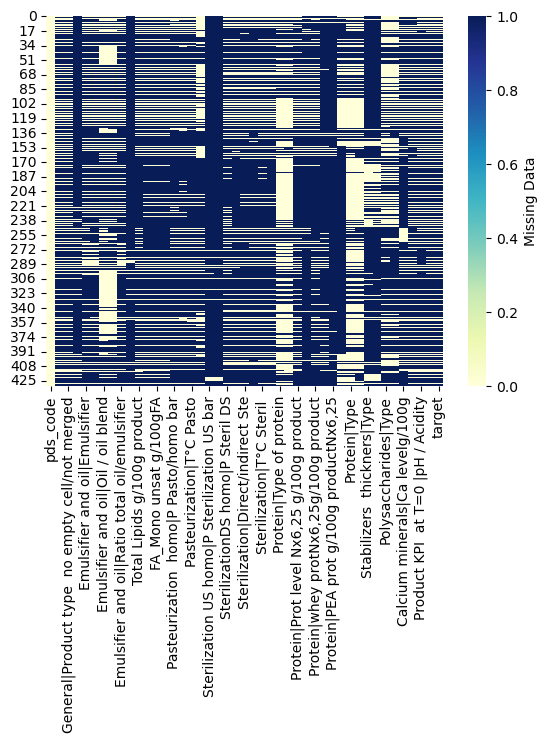

In [6]:
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("./res/visualizing_missing_data_with_heatmap_Seaborn_Python_all.png", dpi=100, bbox_inches='tight')


In [7]:
df.isna().sum()

pds_code                                            0
General|Category no empty cell/not merged         300
General|Product type  no empty cell/not merged    300
General|Subcategory no empty cell/not merged      393
Emulsifier and oil|Emulsifier                     315
Emulsifier and oil|Emulsifier Amount kg/1000L     316
Emulsifier and oil|Oil / oil blend                217
Emulsifier and oil|Oil Amount kg/1000L            224
Emulsifier and oil|Ratio total oil/emulsifier     317
Emulsifier and oil|Phospholipids g/100mL          410
Total Lipids g/100g product                       331
FA_Sat g/100gFA                                   330
FA_Mono unsat g/100gFA                            330
FA_Poly unsatg/100gFA                             330
Pasteurization  homo|P Pasto/homo bar             328
Pasteurization  homo|T°C Pasto/Homo               324
Pasteurization|T°C Pasto                          333
Pasteurization|Time Pasto sec                     269
Sterilization US homo|P Ster

In [8]:
#131 products (unique pds codes)
df['pds_code'].value_counts()

10174999                8
10346498                8
10283747                7
10333991                7
10346499                7
                       ..
10103271                2
10345194                2
10103262                2
10103493                1
Only trial available    1
Name: pds_code, Length: 131, dtype: int64

In [9]:
check_valide_data_dim(df)

number of data points: 131
number of features: 45


# Pivot table

In [10]:
# df = df_raw # only when you destroy df in the following step and when you want the original one

In [11]:
# todo standardize the following part by this function
lst_type_ing = ["Emulsifier and oil|Emulsifier"] 
def add_ingredient(type_ingredient, df):
    print('type of ingredient:', type_ingredientgredient)
    lst_col = ["pds_code"]+list(df.columns[df.columns.str.startswith(type_ingredient)])
    print('list of ingredient col:\n \t', lst_col)
    print('col found in df:\n \t', df.columns.intersection(lst_col))
    df_ing = df[df.columns.intersection(lst)].pivot_table(index=['pds_code'], columns=type_ingredient, values=type_ingredient + ' Amount kg/1000L', aggfunc='first', fill_value=0)
    df_ing.columns = type_ingredient + '_' + df_ing.columns
    print(df_ing)
    lst_col=df_ing.columns
    df_ing["Emulsifier_total_amount"]=df_emulsifier.sum(axis=1)
    df_ing[lst_col]=df_emulsifier[lst_col].div(df_emulsifier[lst_col].sum(axis=1), axis=0)
    df=df.drop(columns=list(df.columns[df.columns.str.startswith("Emulsifier and oil|Emulsifier")]))
    df=pd.merge(df,df_emulsifier,on='pds_code')
    
    

In [12]:
lst=["pds_code"]+list(df.columns[df.columns.str.startswith("Emulsifier and oil|Emulsifier")])
print(lst)
df[df.columns.intersection(lst)]

['pds_code', 'Emulsifier and oil|Emulsifier', 'Emulsifier and oil|Emulsifier Amount kg/1000L']


,pds_code,Emulsifier and oil|Emulsifier,Emulsifier and oil|Emulsifier Amount kg/1000L
0,10103262,Soy lecithin LIQUID - E322,1.020
1,10103262,NaN,NaN
2,10103271,Soy lecithin LIQUID - E322,1.050
3,10103271,NaN,NaN
4,10103278,NaN,NaN
...,...,...,...
426,10457046,NaN,NaN
427,10457046,NaN,NaN
428,10457045,Soy lecithin LIQUID - E322,4.982
429,10457045,NaN,NaN


In [13]:
df_emulsifier=df[df.columns.intersection(lst)].pivot_table(index=['pds_code'], columns='Emulsifier and oil|Emulsifier',values='Emulsifier and oil|Emulsifier Amount kg/1000L', aggfunc='first', fill_value=0)
df_emulsifier.columns="Emulsifier and oil|Emulsifier_"+df_emulsifier.columns
lst_col=df_emulsifier.columns
df_emulsifier["Emulsifier_total_amount"]=df_emulsifier.sum(axis=1)
df_emulsifier[lst_col]=df_emulsifier[lst_col].div(df_emulsifier[lst_col].sum(axis=1), axis=0)
df_emulsifier.to_csv("./res/df_emulsifier.txt",sep=";",header=True,index=True)
df_emulsifier

Emulsifier and oil|Emulsifier,Emulsifier and oil|Emulsifier_Citrem LIQUID - E472c,Emulsifier and oil|Emulsifier_Citrem POWDER - E472c,Emulsifier and oil|Emulsifier_DIMODAN - E471,Emulsifier and oil|Emulsifier_KIRNOL - E471,Emulsifier and oil|Emulsifier_LAMEMUL - E471,Emulsifier and oil|Emulsifier_Soy lecithin LIQUID - E322,Emulsifier and oil|Emulsifier_Soy lecithin POWDER - E322,Emulsifier and oil|Emulsifier_Sunflower lecithin - E322,Emulsifier_total_amount
pds_code,,,,,,,,,
1005390,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.000
1005391,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.000
1005880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.000
1005881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.000
1005882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.000
...,...,...,...,...,...,...,...,...,...
10457046,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.145
10460857,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000
10460858,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000


In [14]:
check_valide_data_dim(df)
df=df.drop(columns=list(df.columns[df.columns.str.startswith("Emulsifier and oil|Emulsifier")]))
check_valide_data_dim(df)
df=pd.merge(df,df_emulsifier,on='pds_code', how='outer')
print(df.shape)
check_valide_data_dim(df)

number of data points: 131
number of features: 45
number of data points: 131
number of features: 43
(431, 52)
number of data points: 131
number of features: 52


## oil

In [15]:
lst=["pds_code"]+list(df.columns[df.columns.str.startswith("Emulsifier and oil|Oil")])
df[df.columns.intersection(lst)]

,pds_code,Emulsifier and oil|Oil / oil blend,Emulsifier and oil|Oil Amount kg/1000L
0,10103262,OB Canola/HO,31.5
1,10103262,NaN,NaN
2,10103271,OB Canola/HO,32.7
3,10103271,NaN,NaN
4,10103278,MCT oil,8.81
...,...,...,...
426,10457046,NaN,NaN
427,10457046,NaN,NaN
428,10457045,Oil blend Acropolis & Algae oil DHA+EPA,81.351
429,10457045,NaN,NaN


In [16]:
df_oil=df[df.columns.intersection(lst)].pivot_table(index=['pds_code'], columns='Emulsifier and oil|Oil / oil blend',values='Emulsifier and oil|Oil Amount kg/1000L', aggfunc='first', fill_value=0)
df_oil.columns="Emulsifier and oil|Oil_"+df_oil.columns
df_oil = df_oil.apply(pd.to_numeric, errors='coerce').fillna(0) 
lst_col=df_oil.columns
df_oil["oil_total_amount"]=df_oil.sum(axis=1)
df_oil[lst_col]=df_oil[lst_col].div(df_oil[lst_col].sum(axis=1), axis=0)
df_oil.to_csv("./res/df_oil.txt",sep=";",header=True,index=True)
df_oil

Emulsifier and oil|Oil / oil blend,Emulsifier and oil|Oil_Algae oil DHA+EPA,Emulsifier and oil|Oil_Anhydrous milk fat,Emulsifier and oil|Oil_Canola oil,Emulsifier and oil|Oil_Canola oil,Emulsifier and oil|Oil_Coconut oil,Emulsifier and oil|Oil_Corn oil,Emulsifier and oil|Oil_EPA,Emulsifier and oil|Oil_Egg lipids,Emulsifier and oil|Oil_MCT oil,Emulsifier and oil|Oil_OB 5,...,Emulsifier and oil|Oil_Oil evening primrose,Emulsifier and oil|Oil_Oil fish EPA:18 DHA:12,Emulsifier and oil|Oil_Organic OB POF,Emulsifier and oil|Oil_Palm oil,Emulsifier and oil|Oil_Rapeseed oil,Emulsifier and oil|Oil_Soy oil,Emulsifier and oil|Oil_Sunflower oil,Emulsifier and oil|Oil_What about the fish oil&ARA?,Emulsifier and oil|Oil_corn oil,oil_total_amount
pds_code,,,,,,,,,,,,,,,,,,,,,
1005390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,60.500
1005391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,60.500
1005614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.037564,0.0,0.0,0.0,0.0,35.140
1005880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,44.000
1005881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,65.095
10460858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,43.081
10466534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.968


In [17]:
df=df.drop(columns=list(df.columns[df.columns.str.startswith("Emulsifier and oil|Oil")]))
df=pd.merge(df,df_oil,on='pds_code', how='outer')
check_valide_data_dim(df)

number of data points: 131
number of features: 76


## Polysaccharides

In [18]:
lst=["pds_code"]+list(df.columns[df.columns.str.startswith("Polysaccharides")])
lst
df[df.columns.intersection(lst)]

,pds_code,Polysaccharides|Type,Polysaccharides|Amount kg/1000L
0,10103262,Sugar,60.000
1,10103262,Liquid maltodextrin,180.600
2,10103271,Liquid maltodextrin,105.440
3,10103271,Sugar,50.000
4,10103278,Liquid maltodextrin,215.177
...,...,...,...
426,10457046,NaN,NaN
427,10457046,NaN,NaN
428,10457045,Maltodextrin,269.197
429,10457045,NaN,NaN


In [19]:
df_polysaccharides=df[df.columns.intersection(lst)].pivot_table(index=['pds_code'], columns='Polysaccharides|Type',values='Polysaccharides|Amount kg/1000L', aggfunc='first', fill_value=0)
df_polysaccharides.columns="Polysaccharides_"+df_polysaccharides.columns
df_polysaccharides = df_polysaccharides.apply(pd.to_numeric, errors='coerce').fillna(0) 
lst_col=df_polysaccharides.columns
df_polysaccharides["polysaccharides_total_amount"]=df_polysaccharides.sum(axis=1)
df_polysaccharides[lst_col]=df_polysaccharides[lst_col].div(df_polysaccharides[lst_col].sum(axis=1), axis=0)
df_polysaccharides.to_csv("./res/df_polysaccharides.txt",sep=";",header=True,index=True)
df_polysaccharides

Polysaccharides|Type,Polysaccharides_Fructose,Polysaccharides_Glucose,Polysaccharides_Glucose syrup,Polysaccharides_Isomaltulose,Polysaccharides_Lactose,Polysaccharides_Liquid maltodextrin,Polysaccharides_Maltodextrin,Polysaccharides_Starch,Polysaccharides_Sucrose,Polysaccharides_Sugar,polysaccharides_total_amount
pds_code,,,,,,,,,,,
1005390,0.000000,0.000000,0.0,0.0,0.0,0.0,0.409526,0.0,0.0,0.590474,158.720
1005391,0.000000,0.000000,0.0,0.0,0.0,0.0,0.409526,0.0,0.0,0.590474,158.720
1005614,0.141745,0.221995,0.0,0.0,0.0,0.0,0.636259,0.0,0.0,0.000000,78.380
1005880,0.000000,0.000000,0.0,0.0,0.0,0.0,0.504178,0.0,0.0,0.495822,179.500
1005881,0.000000,0.000000,0.0,0.0,0.0,0.0,0.598501,0.0,0.0,0.401499,186.800
...,...,...,...,...,...,...,...,...,...,...,...
10457046,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,270.306
10460857,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,210.496
10460858,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,144.649


In [20]:
df=df.drop(columns=list(df.columns[df.columns.str.startswith("Polysaccharides")]))
df=pd.merge(df,df_polysaccharides,on='pds_code', how='outer')
check_valide_data_dim(df)

number of data points: 131
number of features: 85


## protein


In [21]:
lst=["pds_code"]+list(df.columns[df.columns.str.startswith("Protein")])
lst


['pds_code',
 'Protein|Type of protein',
 'Protein|intact / hydrolysate/am acids',
 'Protein|Prot level Nx6,25 g/100g product',
 'Protein|casein Nx6,25g/100g product',
 'Protein|whey protNx6,25g/100g product',
 'Protein|SOY prot g/100g productNx6,25',
 'Protein|PEA prot g/100g productNx6,25',
 'Protein|Content kg/L',
 'Protein|Type',
 'Protein|Amount kg/1000 L']

In [22]:
df['Protein|Type of protein'].value_counts()

Dairy                         235
Plant based                    21
Mix of dairy & plant based     12
Amino acids                     2
Mix of dairy & amino acids      1
Not applicable                  1
Name: Protein|Type of protein, dtype: int64

In [23]:
# df['Protein|Type'].value_counts()

In [24]:
lst = ['pds_code', 'Protein|Type', 'Protein|Amount kg/1000 L']
df[df.columns.intersection(lst)]

,pds_code,Protein|Type,Protein|Amount kg/1000 L
0,10103262,Skimmed milk Liquid,81.1
1,10103262,NaN,NaN
2,10103271,Skimmed milk Liquid,83.7
3,10103271,NaN,NaN
4,10103278,Whey protein hydrolysate,48
...,...,...,...
426,10457046,Soy protein isolate,62.857
427,10457046,NaN,NaN
428,10457045,Pea protein isolate,56.243
429,10457045,Soy protein isolate,62.857


In [25]:
df_protein=df[df.columns.intersection(lst)].pivot_table(index=['pds_code'], columns='Protein|Type',values='Protein|Amount kg/1000 L', aggfunc='first', fill_value=0)
df_protein.columns="Protein_"+df_protein.columns
df_protein = df_protein.apply(pd.to_numeric, errors='coerce').fillna(0) 
lst_col=df_protein.columns
df_protein["protein_total_amount"]=df_protein.sum(axis=1)
df_protein[lst_col]=df_protein[lst_col].div(df_protein[lst_col].sum(axis=1), axis=0)  ### is it a good choice to normalize the ingredients by the total amount of its type (protein, oil, etc.)
df_protein
df_protein.to_csv("./res/df_protein.txt",sep=";",header=True,index=True)

In [26]:
df=df.drop(columns=['Protein|Type', 'Protein|Amount kg/1000 L'])
df=pd.merge(df,df_protein,on='pds_code', how='outer')
check_valide_data_dim(df)

number of data points: 131
number of features: 119


## filter df by na in target

In [27]:
df_unique=df[-df.target.isna()]
df_unique.shape

(131, 119)

In [28]:
#df_unique[["pds_code","target"]][


In [29]:
chars_to_remove = ['.', '-', '(', ')', '\n']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df_unique.columns=df_unique.columns.str.replace(regular_expression, '', regex=True)

In [30]:
df_unique.columns

Index(['pds_code', 'General|Category no empty cell/not merged',
       'General|Product type  no empty cell/not merged',
       'General|Subcategory no empty cell/not merged',
       'Emulsifier and oil|Ratio total oil/emulsifier',
       'Emulsifier and oil|Phospholipids g/100mL',
       'Total Lipids g/100g product', 'FA_Sat g/100gFA',
       'FA_Mono unsat g/100gFA', 'FA_Poly unsatg/100gFA',
       ...
       'Protein_WPC83 Native ', 'Protein_WPI Acid ', 'Protein_WPI Native ',
       'Protein_WPI neutralized', 'Protein_WPI sweet',
       'Protein_Whey protein hydrolysate', 'Protein_Whey rich in milk calcium',
       'Protein_Yoghurt powder', 'Protein_whey protein hydrolysate',
       'protein_total_amount'],
      dtype='object', length=119)

In [31]:
df_unique=df_unique.replace('\n',"")
# df_unique['Protein|Amount kg/1000 L']=df_unique['Protein|Amount kg/1000 L'].str.replace("\n",'')

In [32]:
df_unique.to_csv("./res/df_final_analysis.txt",index=False,header=True,sep="\t")

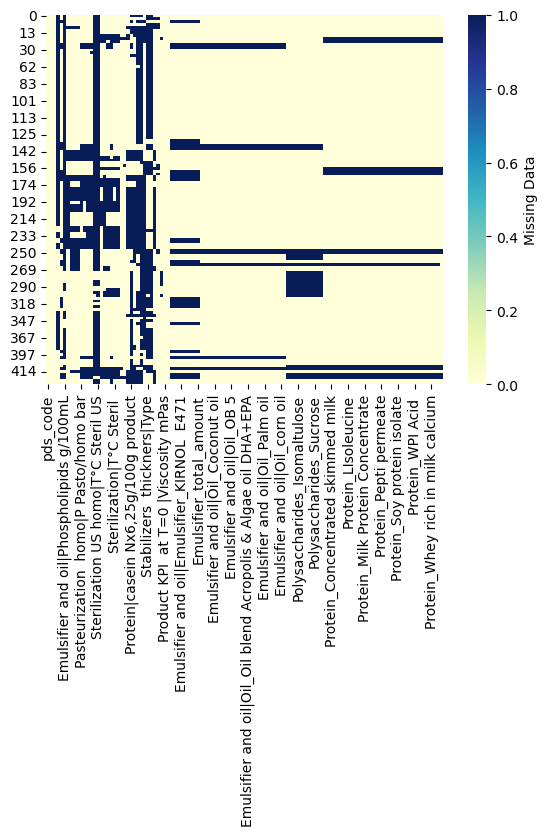

In [33]:
sns.heatmap(df_unique.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("./res/visualizing_missing_data_with_heatmap_Seaborn_Python_df_aftercleaning.png", dpi=100, bbox_inches='tight')


In [34]:
df_unique.isna().sum().to_csv("./res/missing_value_count.txt",header=False,index=True)

In [35]:
len(df_unique["pds_code"].unique())

131

# test 
les codes suivants sont utilise pour tester different solution 


In [36]:
df['Protein|intact / hydrolysate/am acids'].value_counts()

Intact            257
Hydrolyzed         11
Amino acids         3
Not applicable      1
Name: Protein|intact / hydrolysate/am acids, dtype: int64

In [37]:
#not enough data by defined cluster
pds_code=df['pds_code'][df['Protein|intact / hydrolysate/am acids'].isin(["Amino acids","Hydrolyzed"])].unique()
#df_hydrolysated=df[df['Recipe no. (no empty cell/not merged)'].isin(pds_code)]
#df_hydrolysated=df_hydrolysated.dropna(axis=1, how='all')
#df_hydrolysated.shape
#sns.heatmap(df_hydrolysated.isna(),
#            cmap="YlGnBu",
#            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100, bbox_inches='tight')


In [38]:
len(df['pds_code'].unique())

131

In [39]:
len(pds_code)

11

In [40]:
df_hydrolysated.to_csv('df_hydrolysated.csv',sep=";",header=True,index=False)

NameError: name 'df_hydrolysated' is not defined

In [ ]:
import re
[i for i in df_hydrolysated.columns if  any(re.findall(r'Emulsifier and oil|Pasteurization|Sterilization \nUS homogenization', i, re.IGNORECASE))]

In [ ]:
col_list=['Emulsifier and oil|Oil / oil blend','Emulsifier and oil|Amount (kg/1000L)',
'Pasteurization \n homogenization|Pressure (bar)','Pasteurization \n homogenization|Temperature (°C)',
'Pasteurization\n|Temperature (°C)','Pasteurization\n|Temperature (°C)',
'Pasteurization\n|Time (sec)',
'Protein|Type of protein', 'Protein|intact / hydrolysate/amino acids',
'Type','Amount (kg/1000 L)'
]



In [ ]:
mask=df_hydrolysated[['Level of challenge related to emulsion stab : 1 to 4\n4 = product in development\n3 =High challenge\n1 = Low/No challenge| (cf instruction tab for definitions of score)']].isna().all(1)
out[~mask]

In [ ]:
out[~mask].shape